In [2]:
import cv2
import numpy as np
import imutils 
import matplotlib.pyplot as plt


In [3]:
im=cv2.imread('Vehicle_registration_plates_of_Transnistria.jpg')
cv2.imshow('Image',im)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [4]:
im2=imutils.resize(im,width=700)
cv2.imshow('Image',im2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
imG=cv2.cvtColor(im2,cv2.COLOR_RGB2GRAY);
cv2.imshow('Image',imG)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
im4=cv2.Canny(imG,200,100)
cv2.imshow('Image',im4)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
imFilter = cv2.bilateralFilter(imG,9,75,75)
cv2.imshow('Image',imFilter)
cv2.waitKey(0)
cv2.destroyAllWindows()
imCanny=cv2.Canny(imFilter,300,200)
cv2.imshow('Image',imCanny)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
contours, hierarchy = cv2.findContours(imCanny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_sorted=sorted(contours,key=cv2.contourArea,reverse=True)[:20]
cv2.drawContours(im2,contours_sorted, -1, (0, 255, 0), 3)
cv2.imshow('Image',im2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
for c in contours_sorted:
    approx = cv2.approxPolyDP(c,10, True)
    if len(approx) == 4:
        screenCnt = approx
        screenCnt
        break

screenCnt


array([[[621, 178]],

       [[ 77, 176]],

       [[ 75, 272]],

       [[611, 279]]], dtype=int32)

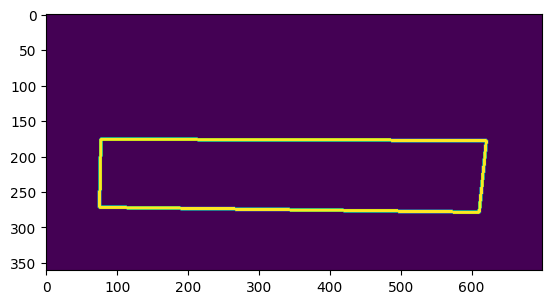

In [10]:
plate_mask0=np.zeros(imG.shape,np.uint8)
plate_mask=cv2.drawContours(plate_mask0,[screenCnt],0,255,3)
plt.imshow(plate_mask)

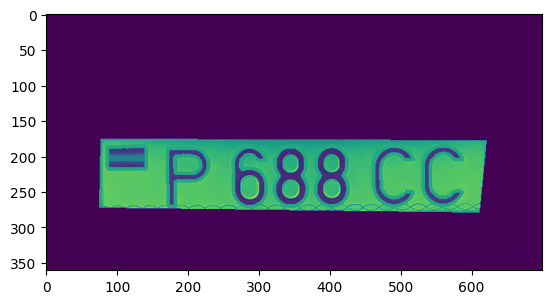

In [11]:
plate_mask0=np.zeros(imG.shape,np.uint8)
plate_mask=cv2.drawContours(plate_mask0,[screenCnt],0,255,-1)
plate_image=cv2.bitwise_and(im2, im2, mask=plate_mask)
plt.imshow(cv2.cvtColor(plate_image,cv2.COLOR_RGB2GRAY))

True

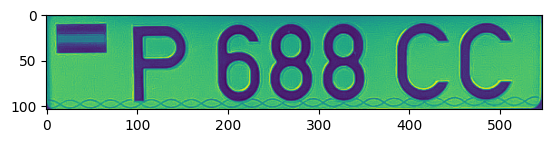

In [12]:
(x,y)=np.where(plate_mask!=0)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
finalplateimage=imG[x1:x2+1,y1:y2+1]
plt.imshow(finalplateimage)
cv2.imwrite("finalplateimage.jpg",finalplateimage)
